In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file1 = "shopping_trends.csv"
file2 = "shopping_trends_updated.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

print(f"First 5 rows of df1:\n{df1.head()}")
print(f"First 5 rows of df2:\n{df2.head()}")
print(f"Columns in df1: {df1.columns}")


First 5 rows of df1:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Dis

In [5]:
print(f"{'='*50}\n")
category_avg = df1.groupby('Category')['Purchase Amount (USD)'].mean()
print(f"Category-wise Average Purchase Amount:\n{category_avg}")
print(f"{'='*50}\n")

season_count = df1.groupby('Season')['Customer ID'].count()
print(f"Purchases per Season:\n{season_count}")
print(f"{'='*50}\n")



Category-wise Average Purchase Amount:
Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

Purchases per Season:
Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Customer ID, dtype: int64



In [6]:
print(f"{'='*50}\n")
payment_total = df1.groupby('Payment Method')['Purchase Amount (USD)'].sum()
print(f"Total Purchases by Payment Method:\n{payment_total}")
print(f"{'='*50}\n")

summary_stats = df1['Purchase Amount (USD)'].describe()
print(f"Summary Statistics for Purchase Amount:\n{summary_stats}")
print(f"{'='*50}\n")


Total Purchases by Payment Method:
Payment Method
Bank Transfer    37123
Cash             38833
Credit Card      42567
Debit Card       37118
PayPal           37449
Venmo            39991
Name: Purchase Amount (USD), dtype: int64

Summary Statistics for Purchase Amount:
count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64



In [7]:
print(f"{'='*50}\n")
gender_avg_purchase = df1.groupby('Gender')['Purchase Amount (USD)'].mean()
print(f"Average Purchase Amount by Gender:\n{gender_avg_purchase}")
print(f"{'='*50}\n")

bins = [0, 19, 29, 39, 49, 59, 100]
labels = ['10s', '20s', '30s', '40s', '50s', '60s+']
df1['Age Group'] = pd.cut(df1['Age'], bins=bins, labels=labels)
age_group_avg_purchase = df1.groupby('Age Group')['Purchase Amount (USD)'].mean()
print(f"Average Purchase Amount by Age Group:\n{age_group_avg_purchase}")
print("="*50)


Average Purchase Amount by Gender:
Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64

Average Purchase Amount by Age Group:
Age Group
10s     60.533333
20s     60.199176
30s     60.139503
40s     58.491204
50s     60.332036
60s+    59.510152
Name: Purchase Amount (USD), dtype: float64


C:\Users\yeyoungyi\AppData\Local\Temp\ipykernel_31892\245907478.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg_purchase = df1.groupby('Age Group')['Purchase Amount (USD)'].mean()


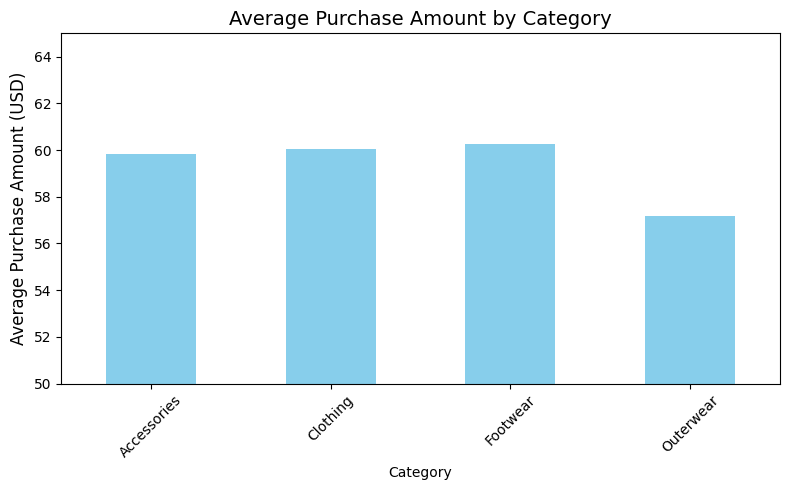

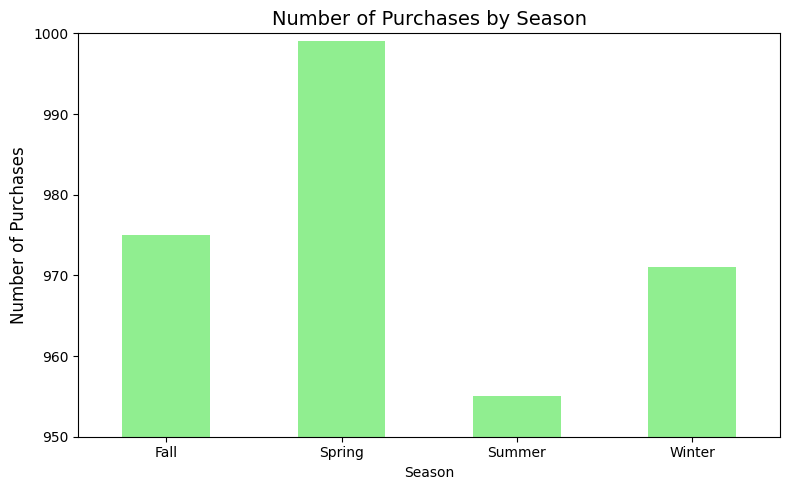

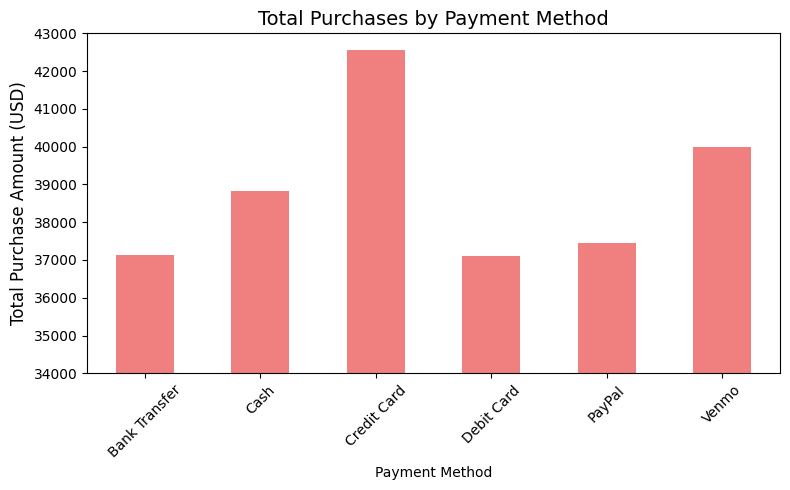

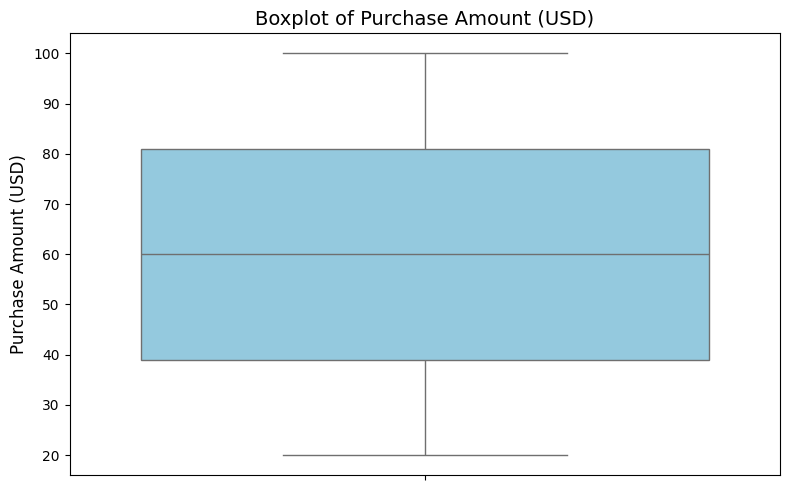

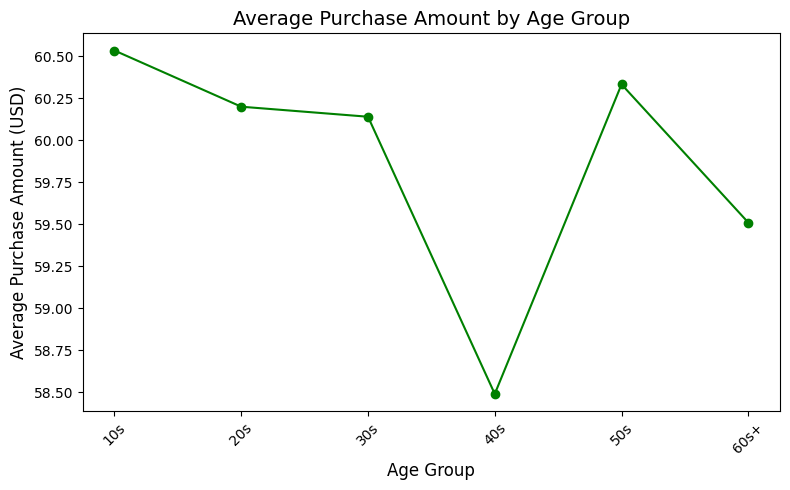

In [15]:
plt.figure(figsize=(8, 5))
category_avg.plot(kind='bar', color='skyblue')
plt.title('Average Purchase Amount by Category', fontsize=14)
plt.ylabel('Average Purchase Amount (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(50, 65)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
season_count.plot(kind='bar', color='lightgreen')
plt.title('Number of Purchases by Season', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(950, 1000)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
payment_total.plot(kind='bar', color='lightcoral')
plt.title('Total Purchases by Payment Method', fontsize=14)
plt.ylabel('Total Purchase Amount (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(34000, 43000)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(y=df1['Purchase Amount (USD)'], color='skyblue')
plt.title('Boxplot of Purchase Amount (USD)', fontsize=14)
plt.ylabel('Purchase Amount (USD)', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
age_group_avg_purchase.plot(kind='line', marker='o', color='green')
plt.title('Average Purchase Amount by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Purchase Amount (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Accuracy: 0.6038

Classification Report:
               precision    recall  f1-score   support

      Female       0.26      0.19      0.22       228
        Male       0.70      0.77      0.73       552

    accuracy                           0.60       780
   macro avg       0.48      0.48      0.48       780
weighted avg       0.57      0.60      0.58       780


Confusion Matrix:
 [[ 44 184]
 [125 427]]


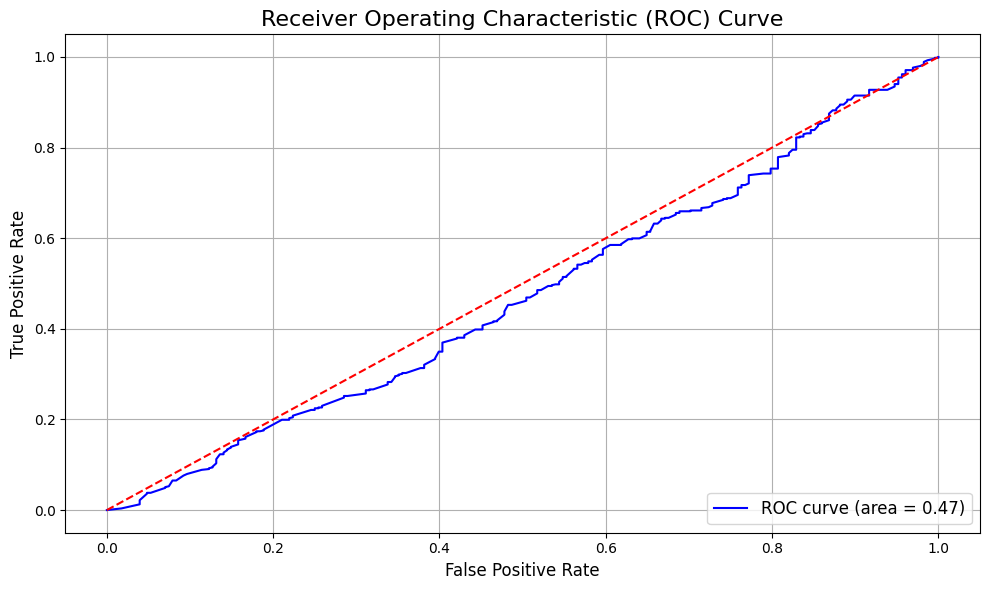

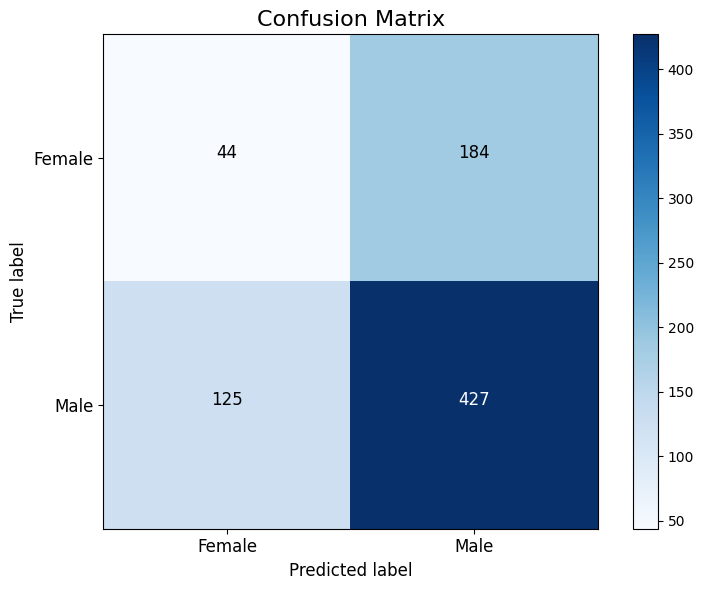

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import itertools

X = df1[['Purchase Amount (USD)', 'Age', 'Season']]
y = df2['Gender']

X = pd.get_dummies(X, columns=['Season'], drop_first=True) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label=model.classes_[1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=16)
plt.colorbar()
tick_marks = np.arange(len(model.classes_))
plt.xticks(tick_marks, model.classes_, fontsize=12)
plt.yticks(tick_marks, model.classes_, fontsize=12)
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black", fontsize=12)
plt.tight_layout()
plt.show()